**LOADING THE DATA-SET AND OVERVIEW**

In [ ]:
import kagglehub
import os

try:
    # ✅ Download dataset
    path = kagglehub.dataset_download("amitabhajoy/bengaluru-house-price-data")
    print("✅ Dataset downloaded to:", path)

    # 📁 List files in the directory
    files = os.listdir(path)
    print("📁 Files inside the dataset folder:", files)

    # 🔍 Look for a CSV file
    csv_files = [f for f in files if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV file found in the downloaded dataset folder.")

    # 📄 Show path to the first CSV file found
    csv_path = os.path.join(path, csv_files[0])
    print("📄 Path to the first CSV file:", csv_path)

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")


100%|██████████| 195k/195k [00:00<00:00, 541kB/s]

Extracting files...
✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/amitabhajoy/bengaluru-house-price-data/versions/2
📁 Files inside the dataset folder: ['Bengaluru_House_Data.csv']
📄 Path to the first CSV file: /root/.cache/kagglehub/datasets/amitabhajoy/bengaluru-house-price-data/versions/2/Bengaluru_House_Data.csv
✅ Final: Script execution completed.


**Data-Assessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
%matplotlib inline
pd.set_option('display.max_columns',30)

In [ ]:
df=pd.read_csv(csv_path)
print(df.shape)

(13320, 9)


In [ ]:
# Create a working copy
df2 = df.copy()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9879,Built-up Area,Ready To Move,Vishwapriya Layout,5 Bedroom,NaN,2800,5.0,3.0,130.00
5585,Built-up Area,Ready To Move,Doddanekundi,2 BHK,NaN,1148,2.0,1.0,59.00
6211,Plot Area,Ready To Move,Thirumenahalli,5 Bedroom,NaN,1200,4.0,2.0,115.00
2790,Super built-up Area,Ready To Move,Whitefield,3 BHK,Brony H,1800,3.0,NaN,110.00
1268,Super built-up Area,Ready To Move,Sarjapur Road,2 BHK,CharkGr,1128,2.0,2.0,59.00
10044,Super built-up Area,Ready To Move,Sarjapur,2 BHK,NaN,1175,2.0,1.0,41.68
12816,Built-up Area,Ready To Move,Gulakamale,2 BHK,SLenssh,1200,2.0,3.0,50.00
5387,Built-up Area,Ready To Move,Doddakannelli,3 BHK,Sueesti,1477,2.0,2.0,80.00
9787,Built-up Area,Ready To Move,Budigere,1 BHK,PrityTr,664,1.0,1.0,34.00
2736,Built-up Area,Ready To Move,Sompura,3 BHK,Suiseit,1025,2.0,0.0,37.00


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
society,5502
balcony,609
bath,73
size,16
location,1
area_type,0
availability,0
total_sqft,0
price,0


In [ ]:
df[df.isnull().any(axis=1)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


In [ ]:
df[df['bath'].isnull()]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.000
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.000
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000


In [ ]:
df[df['society'].isnull()]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


In [ ]:
missing_percent = round(100 * (df.isnull().sum() / len(df.index)), 2)
print(missing_percent)


area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64


In [ ]:
df.duplicated().sum()

np.int64(529)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


**Data-Cleaning**

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('-'*40)


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------------
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 130

In [ ]:
print(df['society'].nunique())
print(df['area_type'].nunique())
print(df['availability'].nunique())
print(df['balcony'].nunique())


2688
4
81
4


*we will drop society and availability feature*
- *society and has more than 40% null value and has 2688(too many categories)*
- *availability has too many categories*


In [ ]:
#so dropping the following the colimns
df.drop(columns=['availability','society','area_type'],inplace=True)

*now, filling the missing valuess*

In [ ]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])


In [ ]:
df['location'] = df['location'].fillna('Whitefield')


In [ ]:
df['location'].isnull().sum()

np.int64(0)

In [ ]:
df['size'] = df['size'].fillna('2 BHK')

In [ ]:
df['size'].isnull().sum()

np.int64(0)

In [ ]:
df['bath'] =df['bath'].fillna(df['bath'].median())

In [ ]:
df['bath'].isnull().sum()

np.int64(0)

In [ ]:
#df['BHK'] = df['size'].str.split().str.get(0).astype(int)
df['BHK'] = df['size'].str.extract(r'(\d+)', expand=False).astype(int)

print(df['BHK'])

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: BHK, Length: 13320, dtype: int64


In [ ]:
df[df['BHK']>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [ ]:
import re


def convert_sqft(x):
    try:
        # Match ranges like "1133 - 1384"
        match = re.match(r'^(\d+\.?\d*)\s*-\s*(\d+\.?\d*)$', x)
        if match:
            return (float(match.group(1)) + float(match.group(2))) / 2

        # Match a single number like "1056" or "2600"
        if re.match(r'^\d+\.?\d*$', x):
            return float(x)

        # Otherwise, return None (invalid or non-numeric)
        return None
    except:
        return None


In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)


In [ ]:
df.sample(10)

,location,size,total_sqft,bath,balcony,price,BHK
11536,Kasavanhalli,3 BHK,1600.0,3.0,3.0,79.0,3
5451,Vittasandra,2 BHK,1246.0,2.0,1.0,65.4,2
9171,Frazer Town,1 Bedroom,560.0,1.0,0.0,90.0,1
1299,Chamrajpet,9 Bedroom,4050.0,7.0,1.0,1200.0,9
8180,HSR Layout,2 BHK,1142.0,2.0,2.0,65.0,2
9640,8th Phase JP Nagar,6 Bedroom,1200.0,6.0,1.0,260.0,6
5642,Ramamurthy Nagar,2 Bedroom,1200.0,2.0,1.0,76.0,2
11597,Thanisandra,2 BHK,1185.0,2.0,2.0,43.5,2
10149,Whitefield,2 BHK,1314.0,2.0,1.0,84.0,2
1554,Hoodi,4 Bedroom,2863.0,4.0,1.0,140.0,4


In [ ]:
df.drop(columns='size',inplace=True)

In [ ]:
df.sample(10)

,location,total_sqft,bath,balcony,price,BHK
7614,Hennur Road,1500.0,5.0,1.0,175.00,5
3195,Gottigere,2000.0,4.0,2.0,82.00,4
9021,Old Madras Road,1157.0,2.0,2.0,47.32,2
2020,5th Block Hbr Layout,1270.0,2.0,2.0,70.00,3
4265,Whitefield,750.0,2.0,1.0,52.70,2
9186,Battarahalli,1200.0,6.0,1.0,100.00,6
13281,Margondanahalli,1375.0,5.0,1.0,125.00,5
11619,Yelahanka New Town,1800.0,2.0,1.0,45.00,3
8160,Whitefield,1356.0,2.0,1.0,94.84,2
4713,Brooke Bond First Cross,1252.0,2.0,2.0,55.00,2


In [ ]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
print(df['price_per_sqft'])

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64


In [ ]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()
print(location_count)

location
Whitefield                              542
Sarjapur  Road                          399
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64


In [ ]:
location_count_less10 = location_count[location_count<=10]
print(location_count_less10)

location
Basapura                                10
Dairy Circle                            10
Nagappa Reddy Layout                    10
Naganathapura                           10
Sector 1 HSR Layout                     10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1053, dtype: int64


In [ ]:
df['location'] = df['location'].apply(lambda x : 'other' if x in location_count_less10 else x)

In [ ]:
df['location'].value_counts()

,count
location,
other,2885
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Tindlu,11
Marsur,11
2nd Phase Judicial Layout,11


In [ ]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
(df['total_sqft']/df['BHK']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [ ]:
#assuming any flat which is has (total sqft/BHK < 300) is not a feasibl flat
df = df[((df['total_sqft']/df['BHK'])>= 300)]
print(df.describe())

         total_sqft          bath       balcony         price           BHK  \
count  12530.000000  12530.000000  12530.000000  12530.000000  12530.000000   
mean    1594.564544      2.559537      1.604629    111.382401      2.650838   
std     1261.271296      1.077938      0.796238    152.077329      0.976678   
min      300.000000      1.000000      0.000000      8.440000      1.000000   
25%     1116.000000      2.000000      1.000000     49.000000      2.000000   
50%     1300.000000      2.000000      2.000000     70.000000      3.000000   
75%     1700.000000      3.000000      2.000000    115.000000      3.000000   
max    52272.000000     16.000000      3.000000   3600.000000     16.000000   

       price_per_sqft  
count    12530.000000  
mean      6303.979357  
std       4162.237981  
min        267.829813  
25%       4210.526316  
50%       5294.117647  
75%       6916.666667  
max     176470.588235  


In [ ]:
df.shape

(12530, 7)

In [ ]:


def remove_outliers_sqft(df):
    df_output = pd.DataFrame()

    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        # Keep only rows within 1 standard deviation from the mean
        gen_df = subdf[(subdf.price_per_sqft >= (m - st)) &
                       (subdf.price_per_sqft <= (m + st))]

        # Append cleaned group to output DataFrame
        df_output = pd.concat([df_output, gen_df], ignore_index=True)

    return df_output

# ✅ Apply the function
df = remove_outliers_sqft(df)

# ✅ Check summary after outlier removal
print(df.describe())


         total_sqft          bath       balcony         price           BHK  \
count  10301.000000  10301.000000  10301.000000  10301.000000  10301.000000   
mean    1508.440608      2.471702      1.607514     91.286372      2.574896   
std      880.694214      0.979449      0.786178     86.342786      0.897649   
min      300.000000      1.000000      0.000000     10.000000      1.000000   
25%     1110.000000      2.000000      1.000000     49.000000      2.000000   
50%     1286.000000      2.000000      2.000000     67.000000      2.000000   
75%     1650.000000      3.000000      2.000000    100.000000      3.000000   
max    30400.000000     16.000000      3.000000   2200.000000     16.000000   

       price_per_sqft  
count    10301.000000  
mean      5659.062876  
std       2265.774749  
min       1250.000000  
25%       4244.897959  
50%       5175.600739  
75%       6428.571429  
max      24509.803922  


In [ ]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        BHK_stats = {}

        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }

        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK - 1)

            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    BHK_df[BHK_df.price_per_sqft < stats['mean']].index.values
                )

    return df.drop(exclude_indices, axis='index')



In [ ]:
df= bhk_outlier_remover(df)

In [ ]:
df.shape

(7361, 7)

In [ ]:
df.sample(10)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
312,Akshaya Nagar,1430.0,2.0,2.0,75.000,3,5244.755245
7132,Vidyaranyapura,2400.0,5.0,1.0,135.000,4,5625.000000
7512,Whitefield,1338.0,2.0,1.0,103.000,2,7698.056801
546,Attibele,400.0,1.0,1.0,10.000,1,2500.000000
1694,Cooke Town,3950.0,4.0,2.0,450.000,4,11392.405063
6897,Uttarahalli,1150.0,2.0,1.0,49.000,2,4260.869565
1091,Begur Road,1410.0,2.0,3.0,54.990,3,3900.000000
8002,other,1500.0,2.0,2.0,185.000,2,12333.333333
3603,JP Nagar,1520.0,3.0,2.0,125.000,3,8223.684211
3645,Jakkur,1260.0,2.0,0.0,71.195,2,5650.396825


In [ ]:
df.drop(columns='price_per_sqft',inplace=True)

In [ ]:
df.sample(10)

,location,total_sqft,bath,balcony,price,BHK
5744,Raja Rajeshwari Nagar,1168.0,2.0,1.0,66.00,2
6612,Talaghattapura,2038.5,3.0,0.0,122.00,3
46,5th Block Hbr Layout,5100.0,5.0,3.0,300.00,6
495,Anjanapura,1280.0,2.0,2.0,45.00,3
5882,Ramagondanahalli,2787.0,5.0,2.0,220.00,4
4261,Kannamangala,1536.0,3.0,1.0,104.00,3
1603,Channasandra,1050.0,2.0,1.0,35.00,2
3838,Kadugodi,1762.0,3.0,3.0,91.45,3
4186,Kanakpura Road,1240.0,2.0,2.0,65.00,2
3868,Kadugodi,1196.0,2.0,3.0,60.00,2


In [ ]:
df['BHK'] = df['BHK'].apply(lambda x: x if x <= 6 else 'Other').astype('category')
df

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...
10292,other,1200.0,2.0,3.0,70.0,2
10293,other,1800.0,1.0,1.0,200.0,1
10296,other,1353.0,2.0,2.0,110.0,2
10297,other,812.0,1.0,0.0,26.0,1


In [ ]:
df['bath'] = df['bath'].astype(int).astype('category')
df['bath'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16], ordered=False, categories_dtype=int64)

In [ ]:
df['bath'] = df['bath'].apply(lambda x: x if x <= 6 else 'Other').astype('category')

df['bath'].value_counts()

,count
bath,
2,4233
3,1765
1,569
4,498
5,175
6,80
Other,41


In [ ]:
df['balcony'] = df['balcony'].astype(int).astype('category')
df['balcony'].dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False, categories_dtype=int64)

In [ ]:
df.rename(columns={'bath': 'bathroom', 'price': 'price (in lakhs)'}, inplace=True)


In [ ]:
df

,location,total_sqft,bathroom,balcony,price (in lakhs),BHK
0,1st Block Jayanagar,2850.0,4,1,428.0,4
1,1st Block Jayanagar,1630.0,3,2,194.0,3
2,1st Block Jayanagar,1875.0,2,3,235.0,3
3,1st Block Jayanagar,1200.0,2,0,130.0,3
4,1st Block Jayanagar,1235.0,2,2,148.0,2
...,...,...,...,...,...,...
10292,other,1200.0,2,3,70.0,2
10293,other,1800.0,1,1,200.0,1
10296,other,1353.0,2,2,110.0,2
10297,other,812.0,1,0,26.0,1


In [ ]:
# extracting Numerical column and object column
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(f'The categorical columns are : \n {cat_cols}')
print(f'The numerical columns are : \n {num_cols}')

The categorical columns are : 
 ['location']
The numerical columns are : 
 ['total_sqft', 'bathroom', 'balcony', 'price (in lakhs)', 'BHK']


In [ ]:
print(f"Total categorical columns: {len(cat_cols)}")
print(f"Total numerical columns: {len(num_cols)}")

Total categorical columns: 1
Total numerical columns: 5


**Feature Engineering**
   


   - Data-Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Step 1: Label encode area_type and location
le_area = LabelEncoder()
le_location = LabelEncoder()

#df['area_type'] = le_area.fit_transform(df['area_type'])
df['location'] = le_location.fit_transform(df['location'])

# Step 2: One-hot encode ordinal features (bathroom, balcony, BHK)
df = pd.get_dummies(df, columns=['bathroom', 'balcony', 'BHK'], drop_first=True)

# Step 3: Separate features and target
X = df.drop('price (in lakhs)', axis=1)
y = df['price (in lakhs)']

# Step 4: Train-test split (assuming you haven't already)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)
x_train_scale

array([[-0.17822992,  0.39298063, -1.16049631, ..., -0.10146491,
        -0.07275171, -0.06529953],
       [-1.44196079, -0.83766974, -1.16049631, ..., -0.10146491,
        -0.07275171, -0.06529953],
       [-0.82963759, -0.20315092, -1.16049631, ..., -0.10146491,
        -0.07275171, -0.06529953],
       ...,
       [ 0.95521942,  0.5657233 , -1.16049631, ..., -0.10146491,
        -0.07275171, -0.06529953],
       [-1.37682003, -0.449281  ,  0.86170028, ..., -0.10146491,
        -0.07275171, -0.06529953],
       [ 1.2418388 ,  0.5140134 , -1.16049631, ..., -0.10146491,
        -0.07275171, -0.06529953]])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5888, 17)
(5888,)
(1473, 17)
(1473,)


**Model Building**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate_regression_model(model, model_name, x_train_scale, y_train, x_test_scale, y_test):
    # Train the regression model
    model.fit(x_train_scale, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train_scale)
    y_test_pred = model.predict(x_test_scale)

    # Calculate regression metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)

    # Print metrics only
    print(f"\n Evaluating Regression Model: {model_name}")
    print(f"Train R² Score: {train_r2:.5f}")
    print(f"Test R² Score: {test_r2:.5f}")
    print(f"MAE (Mean Absolute Error): {mae:.5f}")
    print(f"MSE (Mean Squared Error): {mse:.5f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.5f}")

1. **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
evaluate_regression_model(model, "Linear Regression", x_train_scale, y_train, x_test_scale, y_test)


 Evaluating Regression Model: Linear Regression
Train R² Score: 0.73553
Test R² Score: 0.66169
MAE (Mean Absolute Error): 25.15823
MSE (Mean Squared Error): 3024.18117
RMSE (Root Mean Squared Error): 54.99256


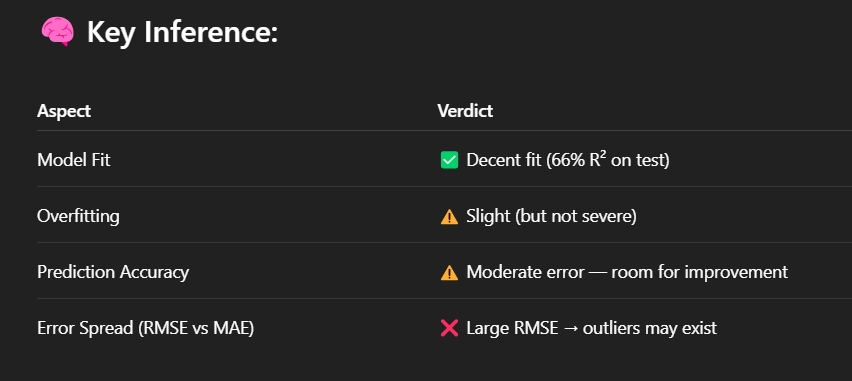

2. **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  # You can experiment with alpha values like 0.1, 10, etc.
evaluate_regression_model(ridge_model, "Ridge Regression", x_train_scale, y_train, x_test_scale, y_test)


 Evaluating Regression Model: Ridge Regression
Train R² Score: 0.73553
Test R² Score: 0.66166
MAE (Mean Absolute Error): 25.15866
MSE (Mean Squared Error): 3024.46518
RMSE (Root Mean Squared Error): 54.99514


3. **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
evaluate_regression_model(model, "Random Forest Regressor", x_train_scale, y_train, x_test_scale, y_test)


 Evaluating Regression Model: Random Forest Regressor
Train R² Score: 0.95575
Test R² Score: 0.74563
MAE (Mean Absolute Error): 20.11142
MSE (Mean Squared Error): 2273.82391
RMSE (Root Mean Squared Error): 47.68463


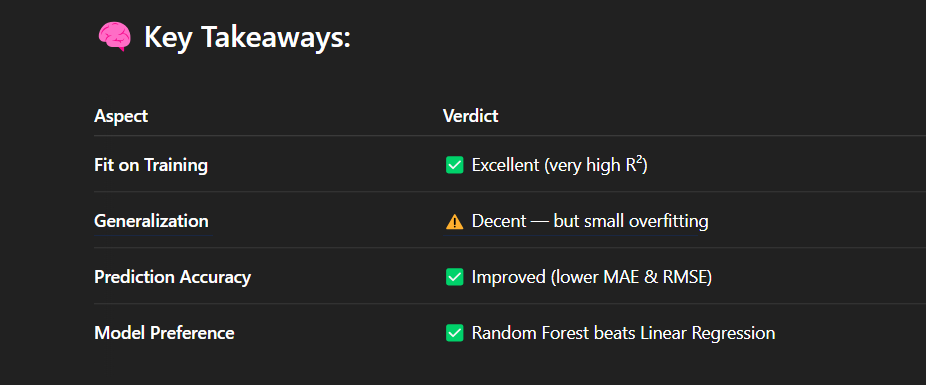

4. **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
evaluate_regression_model(model, "Lasso Regression", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: Lasso Regression
Train R² Score: 0.73460
Test R² Score: 0.66093
MAE (Mean Absolute Error): 25.02825
MSE (Mean Squared Error): 3031.03757
RMSE (Root Mean Squared Error): 55.05486


5.  **Gradient Boosting Machine (GBM)**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
evaluate_regression_model(model, "Gradient Boosting Regressor", x_train_scale, y_train, x_test_scale, y_test)


 Evaluating Regression Model: Gradient Boosting Regressor
Train R² Score: 0.87758
Test R² Score: 0.73754
MAE (Mean Absolute Error): 22.60295
MSE (Mean Squared Error): 2346.19863
RMSE (Root Mean Squared Error): 48.43757


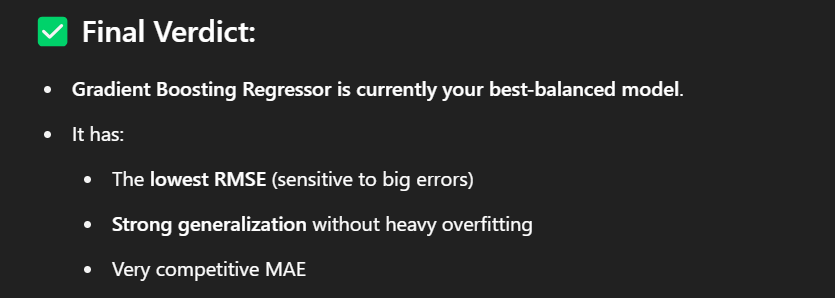

*test accuracy for the above R2 is too low , hence doing backward elimination to decide feature importance and drop certain feature to improve accuracy.
Note: we are performing backward elimination on the df2 the copy dataset*

In [ ]:

import statsmodels.api as sm

# Step 1: Split features (X) and target (y)
X = df2.drop(['price'], axis=1)
y = df2['price']

# Step 2: Convert categorical columns (if any) to numeric using label encoding
X = X.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

# Step 3: Fill missing values (if any) — use median as a safe default
X = X.fillna(X.median())

# Step 4: Add constant for intercept
X = sm.add_constant(X)

# Step 5: Backward Elimination function using p-values
def backward_elimination(X, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        max_pval = model.pvalues.max()
        if max_pval > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Dropping '{excluded_feature}' with p-value = {max_pval:.4f}")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return X, model

# Step 6: Run backward elimination
X_selected, final_model = backward_elimination(X, y)

# Step 7: Show summary of final model
print("\nFinal Model Summary:")
print(final_model.summary())


Dropping 'area_type' with p-value = 0.4687
Dropping 'location' with p-value = 0.2029
Dropping 'availability' with p-value = 0.1975
Dropping 'society' with p-value = 0.1811

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1036.
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:26:23   Log-Likelihood:                -83745.
No. Observations:               13320   AIC:                         1.675e+05
Df Residuals:                   13315   BIC:                         1.675e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                

*so in the above steps.. we drop area_type and comment out its label encoding and run all the cells again*

*Also, finally tried out GBM*

In [ ]:
accuracy_of_model = pd.DataFrame({
    'Model': [
        'Linear Regression', 'Ridge Regression', 'Random Forest Regressor','Lasso Regression',

         'Gradient Boosting Regressor'


    ],
    'Score': [
        0.66169, 0.66166, 0.74978, 0.66093, 0.73736


    ]
})

accuracy_sorted = accuracy_of_model.sort_values(by='Score', ascending=False)


In [ ]:
fig = px.bar(
    data_frame=accuracy_sorted,
    x='Score',
    y='Model',
    color='Score',
    text='Score',
    orientation='h',
    template='plotly_dark',
    title='📊 Regression Models Comparison (Based on Test R² Score)'
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    xaxis_title='Test R² Score',
    yaxis_title='Model',
    title_font_size=22,
    font=dict(size=14),
    bargap=0.3,
    height=600
)

fig.show()